# 1교시

In [3]:
import pandas as pd
import numpy as np
import pydataset

In [6]:
iris = pydataset.data('iris')
iris[:10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


## 1. iris 데이터에서 Species별로 Sepal.Length, Sepal.Width의 평균과 최댓값을 출력하세요

In [12]:
iris.groupby('Species')['Sepal.Length','Sepal.Width'].agg([('평균','mean'),('최대','max')])

C:\Users\user\AppData\Local\Temp\ipykernel_7088\3561243699.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iris.groupby('Species')['Sepal.Length','Sepal.Width'].agg([('평균','mean'),('최대','max')])


Sepal.Length      Sepal.Width     
                     평균   최대          평균   최대
Species                                      
setosa            5.006  5.8       3.428  4.4
versicolor        5.936  7.0       2.770  3.4
virginica         6.588  7.9       2.974  3.8

## 2. 

In [16]:
tips = pydataset.data('tips')
tips[:3]

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3


### 2-1. tip_pct 칼럼 만들기

In [19]:
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])

In [20]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
2,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
3,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
4,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
5,24.59,3.61,Female,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.256166
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759
243,17.82,1.75,Male,No,Sat,Dinner,2,0.108899


In [21]:
### 2-2. day, smoker 로 그룹화 하기

In [22]:
tips.groupby(['day','smoker'])

In [24]:
list(tips.groupby(['day','smoker']))

[(('Fri', 'No'),
       total_bill   tip     sex smoker  day    time  size   tip_pct
  92        22.49  3.50    Male     No  Fri  Dinner     2  0.184308
  95        22.75  3.25  Female     No  Fri  Dinner     2  0.166667
  100       12.46  1.50    Male     No  Fri  Dinner     2  0.136861
  224       15.98  3.00  Female     No  Fri   Lunch     3  0.231125),
 (('Fri', 'Yes'),
       total_bill   tip     sex smoker  day    time  size   tip_pct
  91        28.97  3.00    Male    Yes  Fri  Dinner     2  0.115518
  93         5.75  1.00  Female    Yes  Fri  Dinner     2  0.210526
  94        16.32  4.30  Female    Yes  Fri  Dinner     2  0.357737
  96        40.17  4.73    Male    Yes  Fri  Dinner     4  0.133465
  97        27.28  4.00    Male    Yes  Fri  Dinner     2  0.171821
  98        12.03  1.50    Male    Yes  Fri  Dinner     2  0.142450
  99        21.01  3.00    Male    Yes  Fri  Dinner     2  0.166574
  101       11.35  2.50  Female    Yes  Fri  Dinner     2  0.282486
  102      

In [25]:
### 2-3. min, max, mean, sum 집계 함수 적용하기

In [26]:
tips.groupby(['day','smoker']).agg(['min','max','mean','sum'])

C:\Users\user\AppData\Local\Temp\ipykernel_7088\472559167.py:1: FutureWarning: ['sex', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tips.groupby(['day','smoker']).agg(['min','max','mean','sum'])


total_bill                              tip                   \
                   min    max       mean      sum   min    max      mean   
day  smoker                                                                
Fri  No          12.46  22.75  18.420000    73.68  1.50   3.50  2.812500   
     Yes          5.75  40.17  16.813333   252.20  1.00   4.73  2.714000   
Sat  No           7.25  48.33  19.661778   884.78  1.00   9.00  3.102889   
     Yes          3.07  50.81  21.276667   893.62  1.00  10.00  2.875476   
Sun  No           8.77  48.17  20.506667  1168.88  1.01   6.00  3.167895   
     Yes          7.25  45.35  24.120000   458.28  1.50   6.50  3.516842   
Thur No           7.51  41.19  17.113111   770.09  1.25   6.70  2.673778   
     Yes         10.34  43.11  19.190588   326.24  2.00   5.00  3.030000   

                    size                      tip_pct                      \
                sum  min max      mean  sum       min       max      mean   
day  smoker                                                                 
Fri  No       11.25    2   3  2.250000    9  0.136861  0.231125  0.179740   
     Yes      40.71    1   4  2.066667   31  0.115518  0.357737  0.216293   
Sat  No      139.63    1   4  2.555556  115  0.060217  0.412409  0.190412   
     Yes     120.77    1   5  2.476190  104  0.036955  0.483092  0.179833   
Sun  No      180.57    2   6  2.929825  167  0.063204  0.338101  0.193617   
     Yes      66.82    2   5  2.578947   49  0.070274  2.452381  0.322021   
Thur No      120.32    1   6  2.488889  112  0.078704  0.362976  0.193424   
     Yes      51.51    2   4  2.352941   40  0.098918  0.317965  0.198508   

                        
                   sum  
day  smoker             
Fri  No       0.718960  
     Yes      3.244395  
Sat  No       8.568545  
     Yes      7.552972  
Sun  No      11.036159  
     Yes      6.118397  
Thur No       8.704072  
     Yes      3.374631

### 2-4. 집계함수 결과의 칼럼 이름 변경

In [28]:
tips.groupby(['day','smoker']).agg([('최소','min'),('최대','max'),('평균','mean'),('합계','sum')])

C:\Users\user\AppData\Local\Temp\ipykernel_7088\2988367588.py:1: FutureWarning: ['sex', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tips.groupby(['day','smoker']).agg([('최소','min'),('최대','max'),('평균','mean'),('합계','sum')])


total_bill                              tip                   \
                    최소     최대         평균       합계    최소     최대        평균   
day  smoker                                                                
Fri  No          12.46  22.75  18.420000    73.68  1.50   3.50  2.812500   
     Yes          5.75  40.17  16.813333   252.20  1.00   4.73  2.714000   
Sat  No           7.25  48.33  19.661778   884.78  1.00   9.00  3.102889   
     Yes          3.07  50.81  21.276667   893.62  1.00  10.00  2.875476   
Sun  No           8.77  48.17  20.506667  1168.88  1.01   6.00  3.167895   
     Yes          7.25  45.35  24.120000   458.28  1.50   6.50  3.516842   
Thur No           7.51  41.19  17.113111   770.09  1.25   6.70  2.673778   
     Yes         10.34  43.11  19.190588   326.24  2.00   5.00  3.030000   

                    size                     tip_pct                      \
                 합계   최소 최대        평균   합계        최소        최대        평균   
day  smoker                                                                
Fri  No       11.25    2  3  2.250000    9  0.136861  0.231125  0.179740   
     Yes      40.71    1  4  2.066667   31  0.115518  0.357737  0.216293   
Sat  No      139.63    1  4  2.555556  115  0.060217  0.412409  0.190412   
     Yes     120.77    1  5  2.476190  104  0.036955  0.483092  0.179833   
Sun  No      180.57    2  6  2.929825  167  0.063204  0.338101  0.193617   
     Yes      66.82    2  5  2.578947   49  0.070274  2.452381  0.322021   
Thur No      120.32    1  6  2.488889  112  0.078704  0.362976  0.193424   
     Yes      51.51    2  4  2.352941   40  0.098918  0.317965  0.198508   

                        
                    합계  
day  smoker             
Fri  No       0.718960  
     Yes      3.244395  
Sat  No       8.568545  
     Yes      7.552972  
Sun  No      11.036159  
     Yes      6.118397  
Thur No       8.704072  
     Yes      3.374631

## 3. 문자열 객체를 datatime 객체로 변환하세요
('2023-04-10')

In [31]:
from datetime import datetime

In [34]:
datetime.strptime('2023-04-10', '%Y-%m-%d')

datetime.datetime(2023, 4, 10, 0, 0)

In [39]:
# 방법 2
from dateutil.parser import parse
parse('2023-04-10')

datetime.datetime(2023, 4, 10, 0, 0)

In [40]:
# 방법 3
pd.to_datetime('2023-04-10')

Timestamp('2023-04-10 00:00:00')

### 3-1. 4월 10일이 아니라 10월 4일로 나오게 하려면?

In [43]:
parse("04/10/2023", dayfirst = True)

datetime.datetime(2023, 10, 4, 0, 0)

### 3-2. data1을 기준으로 4등분 하고, 'A','B','C','D' 로 나누고 'grade' 컬럼을 추가하세요

In [45]:
df = pd.DataFrame({'data1': np.random.randn(100), 'data2':np.random.randn(100)}) 
df[:10]

,data1,data2
0,-0.111330,0.545139
1,-0.823429,-0.558490
2,-0.840338,-0.571468
3,0.922813,-0.306015
4,-0.195385,-0.165227
5,-0.847608,0.380793
6,0.531736,1.981441
7,-1.057705,0.637146
8,0.727123,-1.197828
9,2.565491,0.932921


In [48]:
df['grade'] = pd.cut(df['data1'],4,labels = ['A','B','C','D'])

In [50]:
df[:10]

,data1,data2,grade
0,-0.111330,0.545139,B
1,-0.823429,-0.558490,B
2,-0.840338,-0.571468,B
3,0.922813,-0.306015,C
4,-0.195385,-0.165227,B
5,-0.847608,0.380793,B
6,0.531736,1.981441,C
7,-1.057705,0.637146,A
8,0.727123,-1.197828,C
9,2.565491,0.932921,D


In [52]:
from pydataset import data
color = data("HairEyeColor")
color[:5] 

,Hair,Eye,Sex,Freq
1,Black,Brown,Male,32
2,Brown,Brown,Male,53
3,Red,Brown,Male,10
4,Blond,Brown,Male,3
5,Black,Blue,Male,11


## 4. 피벗 테이블을 사용해 hair, sex를 인덱스로하고, eye를 컬럼으로 하는 데이터프레임을 만드세요

In [54]:
color.pivot_table(['Freq'],index=['Hair','Sex'],columns='Eye')

Freq                  
Eye          Blue Brown Green Hazel
Hair  Sex                          
Black Female    9    36     2     5
      Male     11    32     3    10
Blond Female   64     4     8     5
      Male     30     3     8     5
Brown Female   34    66    14    29
      Male     50    53    15    25
Red   Female    7    16     7     7
      Male     10    10     7     7

In [56]:
data = color.pivot_table(index=['Hair','Sex'],columns='Eye')
data

Freq                  
Eye          Blue Brown Green Hazel
Hair  Sex                          
Black Female    9    36     2     5
      Male     11    32     3    10
Blond Female   64     4     8     5
      Male     30     3     8     5
Brown Female   34    66    14    29
      Male     50    53    15    25
Red   Female    7    16     7     7
      Male     10    10     7     7

In [62]:
### 4-1. 성별을 기준으로 집계함수를 이용해 평균과 최대값을 나타내는 표를 만드세요

In [61]:
data.groupby(['Sex']).agg([('평균','mean'),('최대','max')])

Freq                                   
Eye      Blue     Brown     Green      Hazel    
           평균  최대    평균  최대    평균  최대     평균  최대
Sex                                             
Female  28.50  64  30.5  66  7.75  14  11.50  29
Male    25.25  50  24.5  53  8.25  15  11.75  25

## 5.

In [88]:
world_phone = pydataset.data("WorldPhones")
world_phone

,N.Amer,Europe,Asia,S.Amer,Oceania,Africa,Mid.Amer
1951,45939,21574,2876,1815,1646,89,555
1956,60423,29990,4708,2568,2366,1411,733
1957,64721,32510,5230,2695,2526,1546,773
1958,68484,35218,6662,2845,2691,1663,836
1959,71799,37598,6856,3000,2868,1769,911
1960,76036,40341,8220,3145,3054,1905,1008
1961,79831,43173,9053,3338,3224,2005,1076


In [72]:
# world_phone = world_phone.reset_index()

In [73]:
# world_phone

,index,N.Amer,Europe,Asia,S.Amer,Oceania,Africa,Mid.Amer
0,1951,45939,21574,2876,1815,1646,89,555
1,1956,60423,29990,4708,2568,2366,1411,733
2,1957,64721,32510,5230,2695,2526,1546,773
3,1958,68484,35218,6662,2845,2691,1663,836
4,1959,71799,37598,6856,3000,2868,1769,911
5,1960,76036,40341,8220,3145,3054,1905,1008
6,1961,79831,43173,9053,3338,3224,2005,1076


In [89]:
world_phone = world_phone.stack() # 칼럼이름들이 왼쪽에 쌓임

In [90]:
world_phone

1951  N.Amer      45939
      Europe      21574
      Asia         2876
      S.Amer       1815
      Oceania      1646
      Africa         89
      Mid.Amer      555
1956  N.Amer      60423
      Europe      29990
      Asia         4708
      S.Amer       2568
      Oceania      2366
      Africa       1411
      Mid.Amer      733
1957  N.Amer      64721
      Europe      32510
      Asia         5230
      S.Amer       2695
      Oceania      2526
      Africa       1546
      Mid.Amer      773
1958  N.Amer      68484
      Europe      35218
      Asia         6662
      S.Amer       2845
      Oceania      2691
      Africa       1663
      Mid.Amer      836
1959  N.Amer      71799
      Europe      37598
      Asia         6856
      S.Amer       3000
      Oceania      2868
      Africa       1769
      Mid.Amer      911
1960  N.Amer      76036
      Europe      40341
      Asia         8220
      S.Amer       3145
      Oceania      3054
      Africa       1905
      Mid.Amer  

In [91]:
world_phone = pd.DataFrame(world_phone) 

In [92]:
world_phone

0
1951 N.Amer    45939
     Europe    21574
     Asia       2876
     S.Amer     1815
     Oceania    1646
     Africa       89
     Mid.Amer    555
1956 N.Amer    60423
     Europe    29990
     Asia       4708
     S.Amer     2568
     Oceania    2366
     Africa     1411
     Mid.Amer    733
1957 N.Amer    64721
     Europe    32510
     Asia       5230
     S.Amer     2695
     Oceania    2526
     Africa     1546
     Mid.Amer    773
1958 N.Amer    68484
     Europe    35218
     Asia       6662
     S.Amer     2845
     Oceania    2691
     Africa     1663
     Mid.Amer    836
1959 N.Amer    71799
     Europe    37598
     Asia       6856
     S.Amer     3000
     Oceania    2868
     Africa     1769
     Mid.Amer    911
1960 N.Amer    76036
     Europe    40341
     Asia       8220
     S.Amer     3145
     Oceania    3054
     Africa     1905
     Mid.Amer   1008
1961 N.Amer    79831
     Europe    43173
     Asia       9053
     S.Amer     3338
     Oceania    3224
     Africa     2005
     Mid.Amer   1076

In [93]:
world_phone = world_phone.reset_index()
world_phone

,level_0,level_1,0
0,1951,N.Amer,45939
1,1951,Europe,21574
2,1951,Asia,2876
3,1951,S.Amer,1815
4,1951,Oceania,1646
5,1951,Africa,89
6,1951,Mid.Amer,555
7,1956,N.Amer,60423
8,1956,Europe,29990
9,1956,Asia,4708


In [94]:
world_phone.columns=['year','locatioin','phones']

In [95]:
world_phone

,year,locatioin,phones
0,1951,N.Amer,45939
1,1951,Europe,21574
2,1951,Asia,2876
3,1951,S.Amer,1815
4,1951,Oceania,1646
5,1951,Africa,89
6,1951,Mid.Amer,555
7,1956,N.Amer,60423
8,1956,Europe,29990
9,1956,Asia,4708


In [ ]:
world_phone.index.names = ['year']
world_phone.columns.names = ['location']
pd.melt(world_phone, var_name = 'location', value_name='phones') 

In [ ]:
data = pd.DataFrame(world_phones.stack()).reset_index()
data.columns = ["year", "location", "phones"]
data 

In [96]:
world_phone.stack().reset_index().rename({'level_0':'year','level_1':'location',0:'phones'},axis=1) 

NameError: name 'wp' is not defined

# 2교시 428p ~

In [98]:
from datetime import datetime

In [99]:
datetime(2011,1,2)

datetime.datetime(2011, 1, 2, 0, 0)

In [100]:
dates = [datetime(2011,1,2),
         datetime(2011,1,5),
         datetime(2011,1,7),
         datetime(2011,1,8),
         datetime(2011,1,10),
         datetime(2011,1,12)]
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [102]:
ts = pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02    0.473777
2011-01-05    0.016626
2011-01-07    1.559502
2011-01-08    0.703196
2011-01-10   -0.698639
2011-01-12   -1.452509
dtype: float64

In [103]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [104]:
ts[:4]

2011-01-02    0.473777
2011-01-05    0.016626
2011-01-07    1.559502
2011-01-08    0.703196
dtype: float64

In [108]:
ts1= ts[ : : 2]

In [109]:
ts + ts1

2011-01-02    0.947554
2011-01-05         NaN
2011-01-07    3.119004
2011-01-08         NaN
2011-01-10   -1.397279
2011-01-12         NaN
dtype: float64

In [110]:
ts[0]

0.47377699357824515

In [111]:
ts[1]

0.01662648733011929

In [112]:
ts.index[0]

Timestamp('2011-01-02 00:00:00')

In [113]:
ts[ts.index[0]]

0.47377699357824515

In [115]:
ts['2011-01-02']

0.47377699357824515

In [116]:
ts['2011-01']

2011-01-02    0.473777
2011-01-05    0.016626
2011-01-07    1.559502
2011-01-08    0.703196
2011-01-10   -0.698639
2011-01-12   -1.452509
dtype: float64

In [117]:
longer_ts = pd.Series(np.random.rand(1000),index=pd.date_range('1/1/2000', periods=1000))
longer_ts
# Freq : D -> day

2000-01-01    0.525161
2000-01-02    0.347576
2000-01-03    0.252612
2000-01-04    0.085397
2000-01-05    0.434483
                ...   
2002-09-22    0.035696
2002-09-23    0.242389
2002-09-24    0.516945
2002-09-25    0.875449
2002-09-26    0.330518
Freq: D, Length: 1000, dtype: float64

In [118]:
ts = longer_ts.copy()
ts

2000-01-01    0.525161
2000-01-02    0.347576
2000-01-03    0.252612
2000-01-04    0.085397
2000-01-05    0.434483
                ...   
2002-09-22    0.035696
2002-09-23    0.242389
2002-09-24    0.516945
2002-09-25    0.875449
2002-09-26    0.330518
Freq: D, Length: 1000, dtype: float64

In [119]:
ts['2002-09']

2002-09-01    0.378627
2002-09-02    0.954789
2002-09-03    0.855600
2002-09-04    0.971422
2002-09-05    0.724267
2002-09-06    0.923502
2002-09-07    0.928810
2002-09-08    0.191236
2002-09-09    0.035755
2002-09-10    0.233029
2002-09-11    0.900844
2002-09-12    0.599468
2002-09-13    0.001452
2002-09-14    0.515893
2002-09-15    0.612388
2002-09-16    0.423690
2002-09-17    0.391739
2002-09-18    0.013582
2002-09-19    0.244549
2002-09-20    0.479949
2002-09-21    0.380125
2002-09-22    0.035696
2002-09-23    0.242389
2002-09-24    0.516945
2002-09-25    0.875449
2002-09-26    0.330518
Freq: D, dtype: float64

In [120]:
ts['2002-09-01':'2002-09-10']

2002-09-01    0.378627
2002-09-02    0.954789
2002-09-03    0.855600
2002-09-04    0.971422
2002-09-05    0.724267
2002-09-06    0.923502
2002-09-07    0.928810
2002-09-08    0.191236
2002-09-09    0.035755
2002-09-10    0.233029
Freq: D, dtype: float64

In [125]:
ts1 = ts.reset_index()

ts1

,index,0
0,2000-01-01,0.525161
1,2000-01-02,0.347576
2,2000-01-03,0.252612
3,2000-01-04,0.085397
4,2000-01-05,0.434483
...,...,...
995,2002-09-22,0.035696
996,2002-09-23,0.242389
997,2002-09-24,0.516945
998,2002-09-25,0.875449


In [128]:
ts['2002-07':'2002-08']

2002-07-01    0.599485
2002-07-02    0.376010
2002-07-03    0.528757
2002-07-04    0.481703
2002-07-05    0.703206
2002-07-06    0.336475
2002-07-07    0.211486
2002-07-08    0.349645
2002-07-09    0.236396
2002-07-10    0.191197
2002-07-11    0.343078
2002-07-12    0.820876
2002-07-13    0.362812
2002-07-14    0.856785
2002-07-15    0.750641
2002-07-16    0.114041
2002-07-17    0.767772
2002-07-18    0.648530
2002-07-19    0.074586
2002-07-20    0.454528
2002-07-21    0.527483
2002-07-22    0.115606
2002-07-23    0.943998
2002-07-24    0.358197
2002-07-25    0.465524
2002-07-26    0.861584
2002-07-27    0.869128
2002-07-28    0.641290
2002-07-29    0.532089
2002-07-30    0.700566
2002-07-31    0.276055
2002-08-01    0.660629
2002-08-02    0.620580
2002-08-03    0.987437
2002-08-04    0.672954
2002-08-05    0.563765
2002-08-06    0.218012
2002-08-07    0.938977
2002-08-08    0.128252
2002-08-09    0.428558
2002-08-10    0.695151
2002-08-11    0.397756
2002-08-12    0.620059
2002-08-13 

In [129]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
   ....:                           '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates) 
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [130]:
dup_ts['2000-01-02']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [132]:
dup_ts.groupby(level=0).mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [133]:
dup_ts.groupby(level=0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [135]:
index = pd.date_range('2012-04-1','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [136]:
pd.date_range('2012-04-1', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [137]:
pd.date_range(end='2012-06-1', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [138]:
pd.date_range('2012-04-1', '2012-06-1', freq='W-WED')

DatetimeIndex(['2012-04-04', '2012-04-11', '2012-04-18', '2012-04-25',
               '2012-05-02', '2012-05-09', '2012-05-16', '2012-05-23',
               '2012-05-30'],
              dtype='datetime64[ns]', freq='W-WED')

In [139]:
pd.date_range('2012-04-1', '2012-06-1', freq='BM')

DatetimeIndex(['2012-04-30', '2012-05-31'], dtype='datetime64[ns]', freq='BM')

In [141]:
pd.date_range('2012-01-1', '2012-12-31', freq='BM') # BM : 월 영업마감일

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-30', '2012-04-30',
               '2012-05-31', '2012-06-29', '2012-07-31', '2012-08-31',
               '2012-09-28', '2012-10-31', '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', freq='BM')

# 3교시

In [143]:
ts

2000-01-01    0.525161
2000-01-02    0.347576
2000-01-03    0.252612
2000-01-04    0.085397
2000-01-05    0.434483
                ...   
2002-09-22    0.035696
2002-09-23    0.242389
2002-09-24    0.516945
2002-09-25    0.875449
2002-09-26    0.330518
Freq: D, Length: 1000, dtype: float64

In [144]:
pd.DataFrame(ts)

,0
2000-01-01,0.525161
2000-01-02,0.347576
2000-01-03,0.252612
2000-01-04,0.085397
2000-01-05,0.434483
...,...
2002-09-22,0.035696
2002-09-23,0.242389
2002-09-24,0.516945
2002-09-25,0.875449


In [145]:
mpg = pydataset.data('mpg')
mpg[:3]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [146]:
mpg[mpg['manufacturer'] == 'audi']

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [147]:
mpg['cyl'].unique()

array([4, 6, 8, 5], dtype=int64)

In [148]:
# cyl 가 4 또는 6인 것만
mpg[(mpg['cyl'] == 4) | (mpg['cyl'] == 6)]
# mpg[mpg.cyl == 4|6] 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [149]:
ts_df = ts.reset_index()
ts_df[:2]

,index,0
0,2000-01-01,0.525161
1,2000-01-02,0.347576


In [165]:
# 2001-01 만 뽑기
ts_df[(ts_df['index'] >= '2001-01') & (ts_df['index'] < '2001-02')]

,index,0
366,2001-01-01,0.624736
367,2001-01-02,0.615860
368,2001-01-03,0.590745
369,2001-01-04,0.636777
370,2001-01-05,0.375674
371,2001-01-06,0.825163
372,2001-01-07,0.544074
373,2001-01-08,0.424819
374,2001-01-09,0.048134
375,2001-01-10,0.628278


In [154]:
ts_df

,index,0
0,2000-01-01,0.525161
1,2000-01-02,0.347576
2,2000-01-03,0.252612
3,2000-01-04,0.085397
4,2000-01-05,0.434483
...,...,...
995,2002-09-22,0.035696
996,2002-09-23,0.242389
997,2002-09-24,0.516945
998,2002-09-25,0.875449


In [167]:
# 1월부터 3월 까지뽑기
ts_df[(ts_df['index'] >= '2001-01') & (ts_df['index'] < '2001-04')]

,index,0
366,2001-01-01,0.624736
367,2001-01-02,0.615860
368,2001-01-03,0.590745
369,2001-01-04,0.636777
370,2001-01-05,0.375674
371,2001-01-06,0.825163
372,2001-01-07,0.544074
373,2001-01-08,0.424819
374,2001-01-09,0.048134
375,2001-01-10,0.628278


In [168]:
from pandas.tseries.offsets import Hour, Minute

In [169]:
hour = Hour()

In [170]:
type(hour)

pandas._libs.tslibs.offsets.Hour

In [171]:
hour = Hour(4)

In [172]:
hour

<4 * Hours>

In [173]:
Hour(2) + Minute(30)

<150 * Minutes>

In [174]:
pd.date_range('2000-01-01','2000-01-03 23:59')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq='D')

In [177]:
pd.date_range('2000-01-01','2000-01-03 23:59',freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [178]:
pd.date_range('2000-01-01','2000-01-03 23:59',freq='100min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:40:00',
               '2000-01-01 03:20:00', '2000-01-01 05:00:00',
               '2000-01-01 06:40:00', '2000-01-01 08:20:00',
               '2000-01-01 10:00:00', '2000-01-01 11:40:00',
               '2000-01-01 13:20:00', '2000-01-01 15:00:00',
               '2000-01-01 16:40:00', '2000-01-01 18:20:00',
               '2000-01-01 20:00:00', '2000-01-01 21:40:00',
               '2000-01-01 23:20:00', '2000-01-02 01:00:00',
               '2000-01-02 02:40:00', '2000-01-02 04:20:00',
               '2000-01-02 06:00:00', '2000-01-02 07:40:00',
               '2000-01-02 09:20:00', '2000-01-02 11:00:00',
               '2000-01-02 12:40:00', '2000-01-02 14:20:00',
               '2000-01-02 16:00:00', '2000-01-02 17:40:00',
               '2000-01-02 19:20:00', '2000-01-02 21:00:00',
               '2000-01-02 22:40:00', '2000-01-03 00:20:00',
               '2000-01-03 02:00:00', '2000-01-03 03:40:00',
               '2000-01-

In [179]:
pd.date_range('2000-01-01','2000-07-03 23:59',freq='WOM-3FRI')

DatetimeIndex(['2000-01-21', '2000-02-18', '2000-03-17', '2000-04-21',
               '2000-05-19', '2000-06-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## 441p : 데이터 시프트

In [181]:
ts = pd.Series(np.random.randn(4),
   ....:                index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts 

2000-01-31    0.469806
2000-02-29    0.166962
2000-03-31    0.444610
2000-04-30   -0.605427
Freq: M, dtype: float64

In [182]:
ts.shift(1)

2000-01-31         NaN
2000-02-29    0.469806
2000-03-31    0.166962
2000-04-30    0.444610
Freq: M, dtype: float64

In [183]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.469806
2000-04-30    0.166962
Freq: M, dtype: float64

In [184]:
ts.shift(-1)

2000-01-31    0.166962
2000-02-29    0.444610
2000-03-31   -0.605427
2000-04-30         NaN
Freq: M, dtype: float64

In [193]:
ts = pd.Series(np.random.rand(4),
   ....:                index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts 

2000-01-31    0.368777
2000-02-29    0.960152
2000-03-31    0.071388
2000-04-30    0.214738
Freq: M, dtype: float64

In [190]:
ts / ts.shift(1) -1

2000-01-01         NaN
2000-01-02   -0.356591
2000-01-03   -0.555661
2000-01-04   -0.490029
Freq: D, dtype: float64

In [194]:
ts.shift(2,freq='M')

2000-03-31    0.368777
2000-04-30    0.960152
2000-05-31    0.071388
2000-06-30    0.214738
Freq: M, dtype: float64

In [195]:
ts.shift(3, freq='D')

2000-02-03    0.368777
2000-03-03    0.960152
2000-04-03    0.071388
2000-05-03    0.214738
dtype: float64

# 5교시 : 445p ~ 

In [7]:
import pandas as pd
import numpy as np

In [2]:
import pytz

In [4]:
pytz.common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [5]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [8]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(100),index=rng)
ts

2000-01-01   -1.179795
2000-01-02   -0.211043
2000-01-03    1.747957
2000-01-04    1.150419
2000-01-05    0.566587
                ...   
2000-04-05   -0.899695
2000-04-06   -0.610878
2000-04-07    1.065995
2000-04-08   -0.770393
2000-04-09    1.376780
Freq: D, Length: 100, dtype: float64

In [9]:
ts.resample("M")

In [10]:
list(ts.resample("M"))

[(Timestamp('2000-01-31 00:00:00', freq='M'),
  2000-01-01   -1.179795
  2000-01-02   -0.211043
  2000-01-03    1.747957
  2000-01-04    1.150419
  2000-01-05    0.566587
  2000-01-06    0.047943
  2000-01-07    1.782871
  2000-01-08    1.488050
  2000-01-09    2.360110
  2000-01-10   -0.753696
  2000-01-11   -1.015490
  2000-01-12    1.298066
  2000-01-13    1.320187
  2000-01-14    0.812111
  2000-01-15    0.586287
  2000-01-16    0.637124
  2000-01-17   -1.333280
  2000-01-18   -0.161674
  2000-01-19   -0.097184
  2000-01-20   -0.056557
  2000-01-21    0.007974
  2000-01-22   -1.080597
  2000-01-23   -0.938886
  2000-01-24   -1.039353
  2000-01-25   -1.517600
  2000-01-26   -0.169692
  2000-01-27    0.026425
  2000-01-28    0.524934
  2000-01-29    0.247458
  2000-01-30    0.605013
  2000-01-31   -0.313226
  Freq: D, dtype: float64),
 (Timestamp('2000-02-29 00:00:00', freq='M'),
  2000-02-01   -1.527788
  2000-02-02    0.335601
  2000-02-03    1.543916
  2000-02-04    2.739661
  200

In [11]:
ts.resample('M').mean()

2000-01-31    0.172305
2000-02-29    0.211825
2000-03-31    0.135135
2000-04-30   -0.106414
Freq: M, dtype: float64

In [12]:
ts.resample('M',kind='period').mean()

2000-01    0.172305
2000-02    0.211825
2000-03    0.135135
2000-04   -0.106414
Freq: M, dtype: float64

In [19]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-01 00:00:00    0.902343
2000-01-01 00:01:00   -1.466013
2000-01-01 00:02:00    0.918413
2000-01-01 00:03:00   -0.563949
2000-01-01 00:04:00   -0.705111
2000-01-01 00:05:00    1.117471
2000-01-01 00:06:00    0.042624
2000-01-01 00:07:00    1.212113
2000-01-01 00:08:00    0.827435
2000-01-01 00:09:00   -0.082179
2000-01-01 00:10:00   -0.963968
2000-01-01 00:11:00    0.189671
Freq: T, dtype: float64

In [23]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.arange(100),index=rng)
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
              ..
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, Length: 100, dtype: int32

In [30]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(len(rng)),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [31]:
ts.resample('5min').mean()

2000-01-01 00:00:00     2.0
2000-01-01 00:05:00     7.0
2000-01-01 00:10:00    10.5
Freq: 5T, dtype: float64

In [32]:
ts.resample('5min',closed='right').mean()

1999-12-31 23:55:00     0.0
2000-01-01 00:00:00     3.0
2000-01-01 00:05:00     8.0
2000-01-01 00:10:00    11.0
Freq: 5T, dtype: float64

In [33]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [34]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame 

,Colorado,Texas,New York,Ohio
2000-01-05,0.539882,0.194472,-2.403554,0.497429
2000-01-12,1.574263,-0.334148,-1.185546,-0.202088


In [35]:
frame.resample("D").asfreq()

,Colorado,Texas,New York,Ohio
2000-01-05,0.539882,0.194472,-2.403554,0.497429
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.574263,-0.334148,-1.185546,-0.202088


In [38]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.539882,0.194472,-2.403554,0.497429
2000-01-06,0.539882,0.194472,-2.403554,0.497429
2000-01-07,0.539882,0.194472,-2.403554,0.497429
2000-01-08,0.539882,0.194472,-2.403554,0.497429
2000-01-09,0.539882,0.194472,-2.403554,0.497429
2000-01-10,0.539882,0.194472,-2.403554,0.497429
2000-01-11,0.539882,0.194472,-2.403554,0.497429
2000-01-12,1.574263,-0.334148,-1.185546,-0.202088


In [39]:
frame.resample('D').bfill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.539882,0.194472,-2.403554,0.497429
2000-01-06,1.574263,-0.334148,-1.185546,-0.202088
2000-01-07,1.574263,-0.334148,-1.185546,-0.202088
2000-01-08,1.574263,-0.334148,-1.185546,-0.202088
2000-01-09,1.574263,-0.334148,-1.185546,-0.202088
2000-01-10,1.574263,-0.334148,-1.185546,-0.202088
2000-01-11,1.574263,-0.334148,-1.185546,-0.202088
2000-01-12,1.574263,-0.334148,-1.185546,-0.202088


In [40]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.539882,0.194472,-2.403554,0.497429
2000-01-06,0.539882,0.194472,-2.403554,0.497429
2000-01-07,0.539882,0.194472,-2.403554,0.497429
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.574263,-0.334148,-1.185546,-0.202088


In [41]:
frame = pd.DataFrame(np.random.randn(24, 4),
   .....:                      index=pd.period_range('1-2000', '12-2001',
   .....:                                            freq='M'),
   .....:                      columns=['Colorado', 'Texas', 'New York', 'Ohio']) 
frame

,Colorado,Texas,New York,Ohio
2000-01,1.006316,1.826909,-1.449996,-0.243135
2000-02,0.415946,0.169625,-0.966477,2.213119
2000-03,1.048061,0.165584,0.814520,-1.272032
2000-04,-1.482158,1.950854,0.190603,-0.632040
2000-05,0.012140,0.155607,-0.392121,-0.734620
2000-06,-0.089329,1.315712,0.324174,0.362732
2000-07,0.250370,-2.529210,0.065843,1.164401
2000-08,0.261496,-1.102448,2.560899,-0.303649
2000-09,1.997027,-0.738761,1.521480,1.420339
2000-10,1.546469,-0.962237,-0.552118,-0.493654


In [42]:
frame.resample('A-DEC').mean()

,Colorado,Texas,New York,Ohio
2000,0.357511,0.060961,0.153979,0.359940
2001,0.441738,-0.356935,-0.080436,0.430896


In [43]:
frame.resample('A-JUN').mean() # 6 / 12 / 6

,Colorado,Texas,New York,Ohio
2000,0.151829,0.930715,-0.246550,-0.050996
2001,0.508429,-0.546007,0.231201,0.718290
2002,0.429810,-0.430649,-0.068766,0.196088


In [44]:
frame.resample('Q-DEC').mean()

,Colorado,Texas,New York,Ohio
2000Q1,0.823441,0.720706,-0.533984,0.232651
2000Q2,-0.519782,1.140725,0.040885,-0.334643
2000Q3,0.836298,-1.456806,1.382741,0.760363
2000Q4,0.290087,-0.160781,-0.273727,0.781388
2001Q1,-0.293047,-0.440773,-0.137471,0.105133
2001Q2,1.200380,-0.125668,-0.046738,1.226276
2001Q3,-0.476458,-0.390893,-0.156279,0.164504
2001Q4,1.336078,-0.470405,0.018747,0.227671


# 6교시 : 471p ~ 

In [64]:
close_px_all = pd.read_csv('https://gitlab.com/Glf9832/pydata-notebook/-/raw/17670dd2026bedd7e9cebba649c1f50d9c34b86c/examples/stock_px_2.csv',
            index_col=[0],parse_dates=True)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [61]:
pd.read_csv('https://gitlab.com/Glf9832/pydata-notebook/-/raw/17670dd2026bedd7e9cebba649c1f50d9c34b86c/examples/stock_px_2.csv',
            index_col=[0],parse_dates=True,header=None)

,1,2,3,4
0,,,,
NaT,AAPL,MSFT,XOM,SPX
2003-01-02,7.4,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.0,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25


In [62]:
pd.read_csv('https://gitlab.com/Glf9832/pydata-notebook/-/raw/17670dd2026bedd7e9cebba649c1f50d9c34b86c/examples/stock_px_2.csv',
            index_col=[0],parse_dates=True,header=0)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


<Axes: >

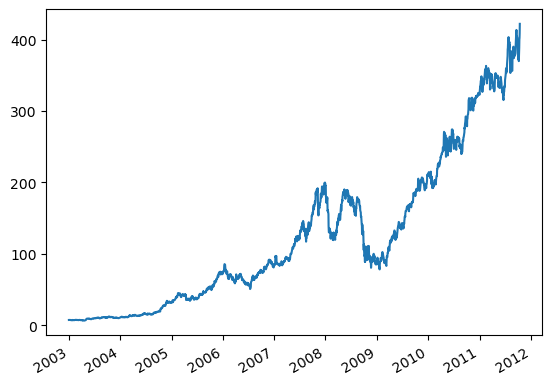

In [65]:
close_px_all['AAPL'].plot()

<Axes: >

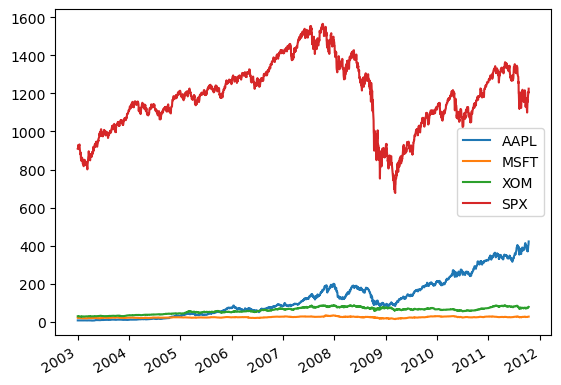

In [66]:
close_px_all.plot()

In [68]:
close_px_all['AAPL'].rolling(250).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    346.53988
2011-10-11    346.93180
2011-10-12    347.28160
2011-10-13    347.64332
2011-10-14    348.09336
Name: AAPL, Length: 2214, dtype: float64

<Axes: >

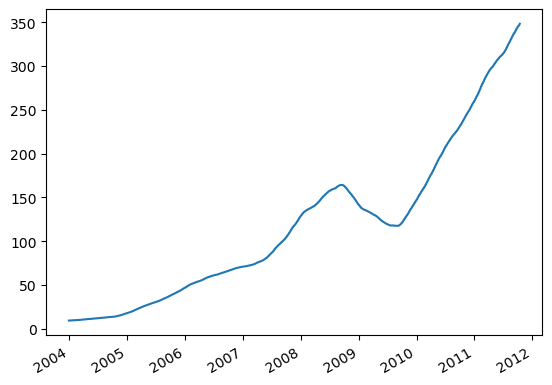

In [69]:
close_px_all['AAPL'].rolling(250).mean().plot()

<Axes: >

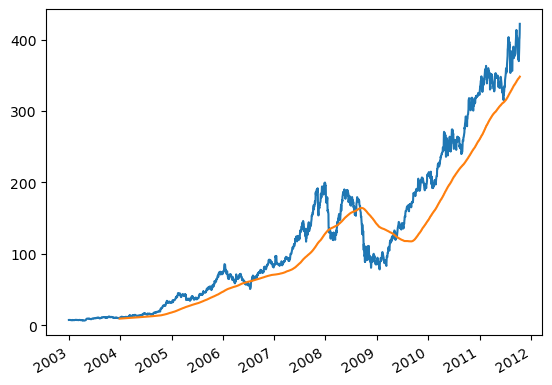

In [70]:
close_px_all['AAPL'].plot()
close_px_all['AAPL'].rolling(250).mean().plot()